In [1]:
## Email SMS SPam Classifier

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [427]:
import numpy as np
import pandas as pd


In [4]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)


Current Working Directory: /content


In [5]:
!ls /content/drive/MyDrive


'Colab Notebooks'


In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/ML/PythonProjects_Main/Mini_Projects/Email_SMS_Spam_Classifier/spam.csv'
print(file_path)

/content/drive/MyDrive/Colab Notebooks/ML/PythonProjects_Main/Mini_Projects/Email_SMS_Spam_Classifier/spam.csv


In [428]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [429]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We dropped as the number of non-values in these columns is very insignifcant


In [431]:
df = df[['v1','v2']]

In [432]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [433]:
## Renaming cols
df.rename(columns = {'v1' : 'target','v2' : 'text'},inplace = True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\161932820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'v1' : 'target','v2' : 'text'},inplace = True)


In [434]:
df.sample(5)

,target,text
5030,ham,Hey... Very inconvenient for your sis a not huh?
58,ham,Tell where you reached
4689,ham,Ok no prob
1239,ham,Hope you are having a great new semester. Do w...
4928,spam,Got what it takes 2 take part in the WRC Rally...


In [435]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [436]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [437]:


df['target']=encoder.fit_transform(df['target'])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\3497701439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


In [438]:
df.sample(5)

,target,text
186,0,"Haha awesome, be there in a minute"
5237,1,Someonone you know is trying to contact you vi...
2434,0,Uncle boye. I need movies oh. Guide me. Plus y...
1219,0,True. It is passable. And if you get a high sc...
1976,0,Lol alright i was thinkin that too haha


In [439]:
##Is missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [440]:
# Check for duplicate values
df.duplicated().sum()

403

In [441]:
# remove duplicates
df.drop_duplicates(keep = 'first',inplace = True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\2076720462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep = 'first',inplace = True)


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [443]:
df.shape

(5169, 2)

In [444]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

### Single Column Analysis

In [445]:
import seaborn as sns

<Axes: xlabel='target'>

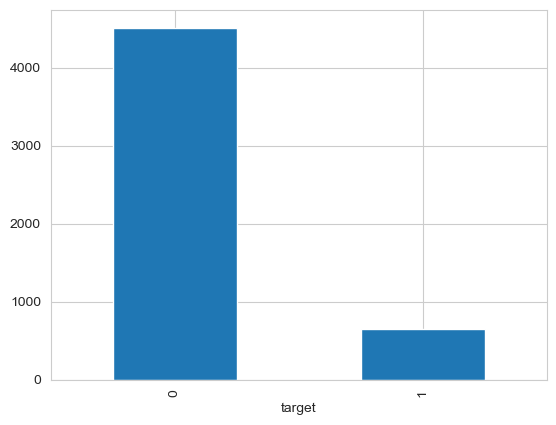

In [446]:
df['target'].value_counts().plot(kind = 'bar')

#### Ratio of spam : correct messages is very low , correct messages are more than 4 times(almost 5 times)

<Axes: ylabel='count'>

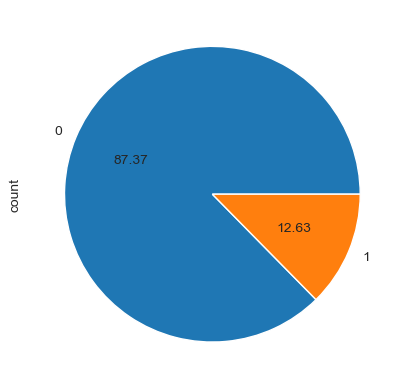

In [447]:
df['target'].value_counts().plot(kind = 'pie',autopct = '%.2f')

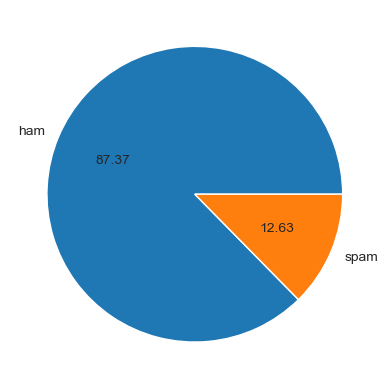

In [448]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

#### Data is imbalanced (Spam is very less )

In [449]:
## Now we analyse the second column in detail

In [450]:
import nltk

In [451]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [452]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

#### Number of charachter used,we will be adding an additional column here so that we could add the number of charachters for each tex tmessage

In [453]:
df['number_charachters'] = df['text'].apply(len)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\3705754392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_charachters'] = df['text'].apply(len)


In [454]:
df.head(5)

,target,text,number_charachters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [455]:
## Number of words,we first use nltk.word_tokenise(x) which would make a list of elements based on splitting based on commas,and then find out it's length
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [456]:
df['number_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\1522005780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [457]:
df.head(5)

,target,text,number_charachters,number_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### Next we find the number of sentences using nltk.sent

In [458]:
df['number_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\3517908130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [459]:
df.head()

,target,text,number_charachters,number_words,number_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [460]:
df[['number_charachters','number_words','number_sentences']].describe()

,number_charachters,number_words,number_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: ylabel='number_sentences'>

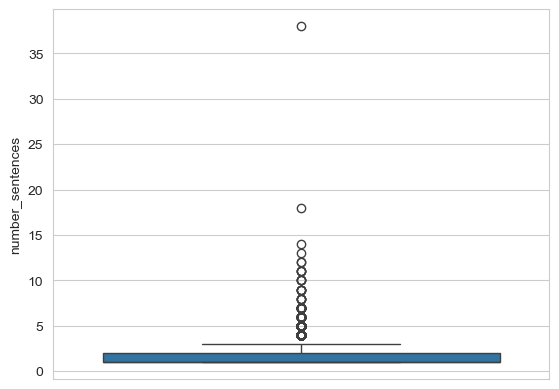

In [461]:
sns.boxplot(y = df['number_sentences'])

In [462]:
## NUmbe rof sentences mainly lie between 1 - 3,but after like 75 percentile the rest 25 percentile consist of sentences with more than 5 going upto 38


Now we will analyse the text by splitting the spam and ham messages

Below is for ham messages

In [463]:
df[df['target'] == 0][['number_charachters','number_words','number_sentences']].describe()

,number_charachters,number_words,number_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


For Spam messages

In [464]:
df[df['target'] == 1][['number_charachters','number_words','number_sentences']].describe()

,number_charachters,number_words,number_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [465]:
## Mean is very high for spam messages,min also very high only the max is low in all
## Smaller messages are not usually spam (in terms of number of charahcters,words,and sentences)
## and also they are not very bigg,their max is 25 percent of max messages in ham

<Axes: xlabel='number_charachters', ylabel='Count'>

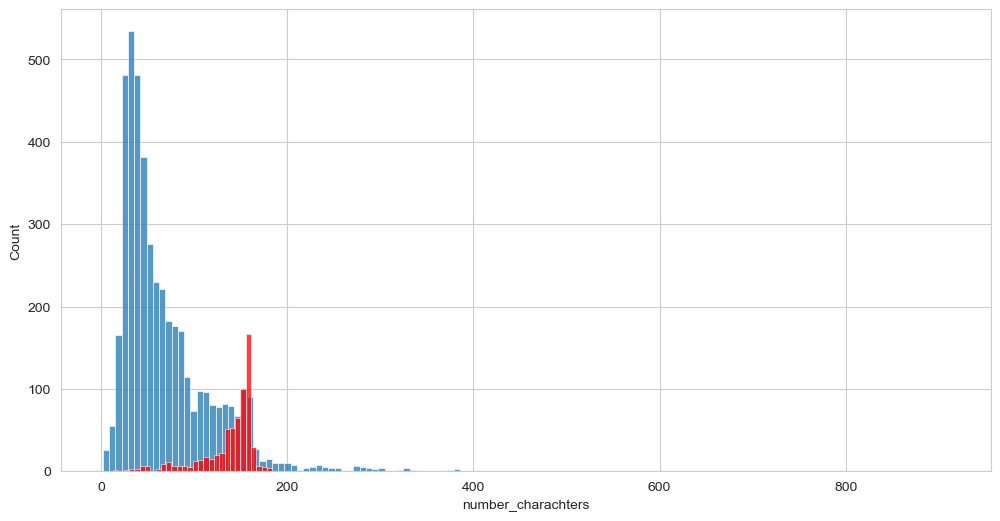

In [466]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['number_charachters'])
sns.histplot(df[df['target'] ==1]['number_charachters'],color = 'red')


<Axes: xlabel='number_words', ylabel='Count'>

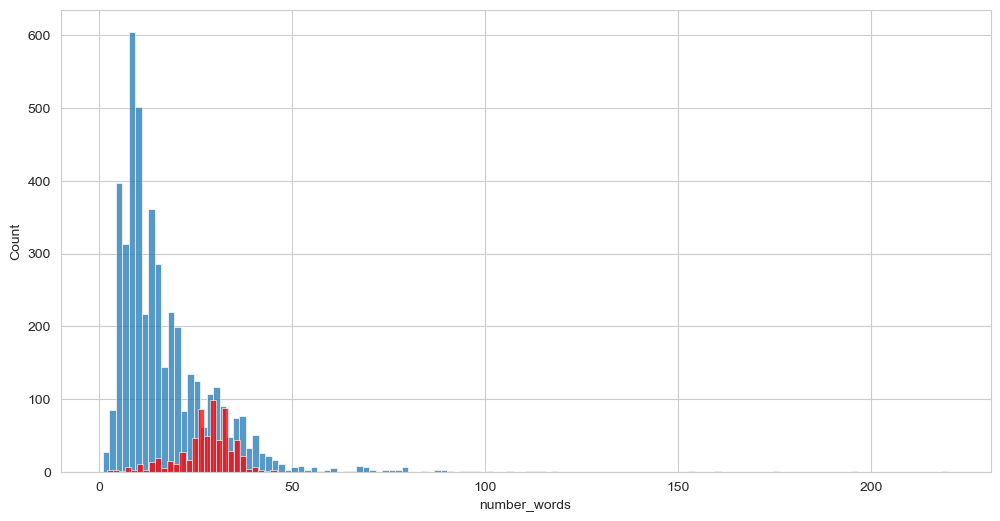

In [467]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]["number_words"])
sns.histplot(df[df['target'] ==1]['number_words'],color = 'red')


<Axes: xlabel='number_sentences', ylabel='Count'>

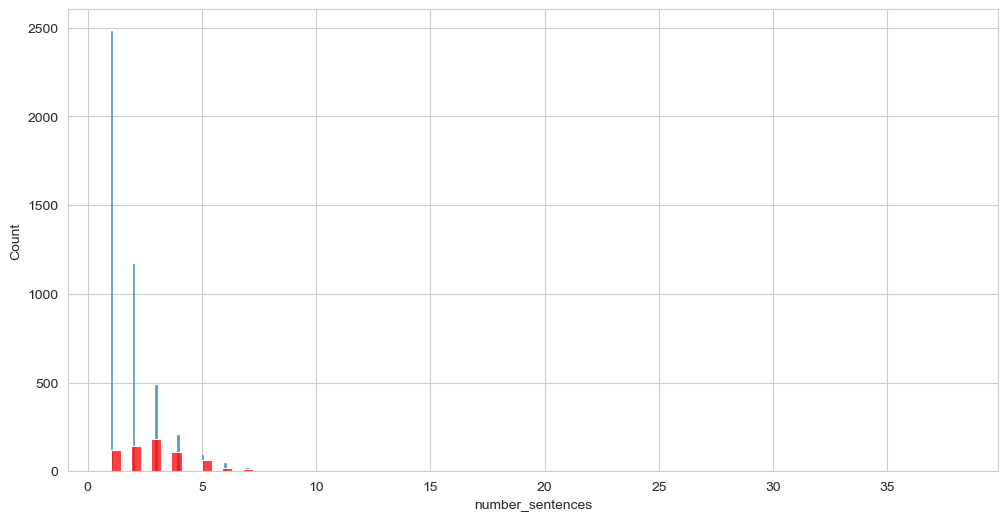

In [468]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]["number_sentences"])
sns.histplot(df[df['target'] ==1]['number_sentences'],color = 'red')


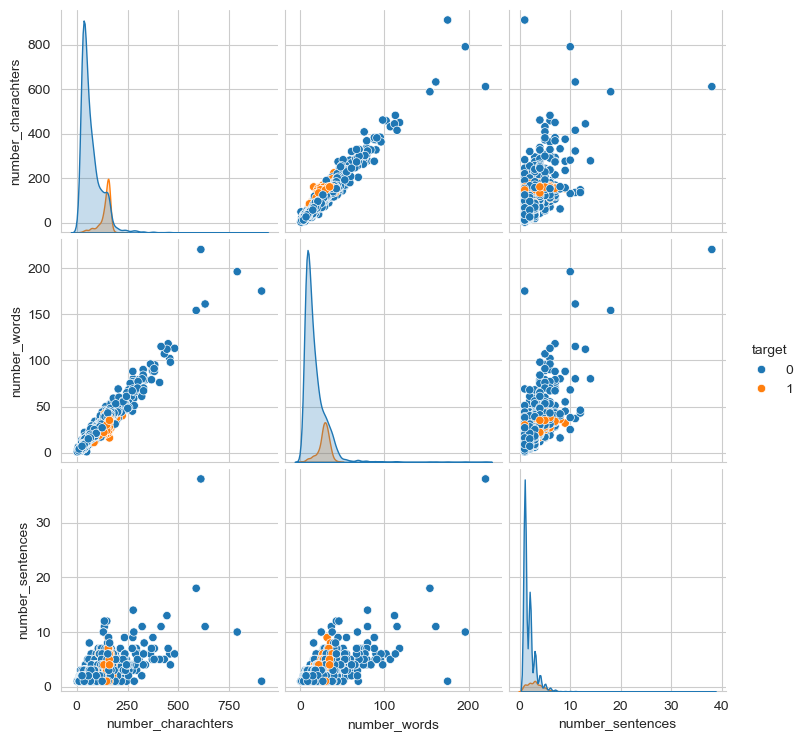

In [469]:
sns.pairplot(df,hue = 'target')

In [470]:
sns.heatmap(df.corr(),annot = True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## we understand that the three are highly correlated wuth each other so we will keep only one column from the 3 and since *charahcter* has a higher correlation with target,we will keep charachter column and remove others

In [471]:
df.drop(['number_words','number_sentences'],axis=1,inplace = True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\1292812813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['number_words','number_sentences'],axis=1,inplace = True)


In [472]:
df

,target,text,number_charachters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


# 3.) Data Preprocessing
  > 1. Lower Case
  > 2. tokenisation
  > 3. Removing Special charahcters
  > 4. Removing stopping words
  > 5. Stemming (Making same meaning words into a common one word which
    will have same meaning)

In [473]:
# for removing stopping words we will be using an inbuilt module called nltk corpus

In [474]:
from nltk.corpus import stopwords


In [475]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [476]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [477]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [478]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [479]:
def transform_text(text):
  ##Lowering the letters
  text = text.lower()
  ## Converting them to list
  text = nltk.word_tokenize(text)
  y=[]
  ## Removing special Charachters
  for i in text:
    if i.isalnum():
      y.append(i)
  text =y[:]
  y.clear()
  ## Removing stopping words and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text =y[:]
  y.clear()
  ## Stemming the words
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [480]:
transform_text('Did you like presentation on ML you dancing ?')

'like present ml danc'

In [481]:
df['transform_text']=df['text'].apply(transform_text)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_27404\196198852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transform_text)


In [482]:
df.head(5)

,target,text,number_charachters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [483]:
from wordcloud import WordCloud

wc = WordCloud(width =500,height =500,min_font_size = 10,background_color='black')

In [484]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep = " "))

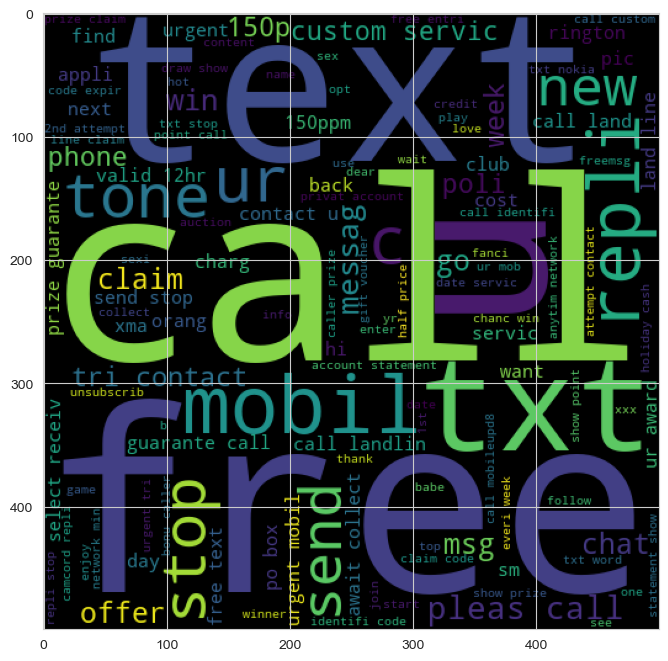

In [485]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [486]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep = " "))

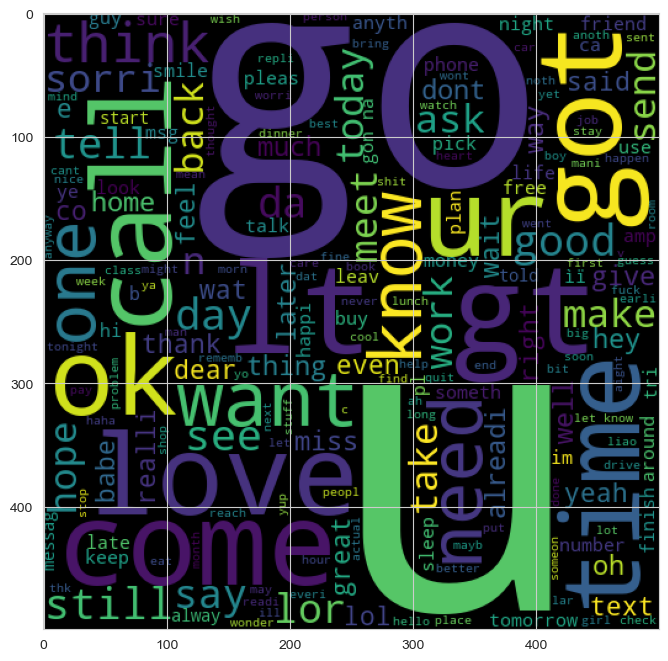

In [487]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [488]:
# We will extract the Top 30 -50 words for each classification

In [489]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [490]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [491]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [492]:

spam_most_common_used = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [493]:
spam_most_common_used[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

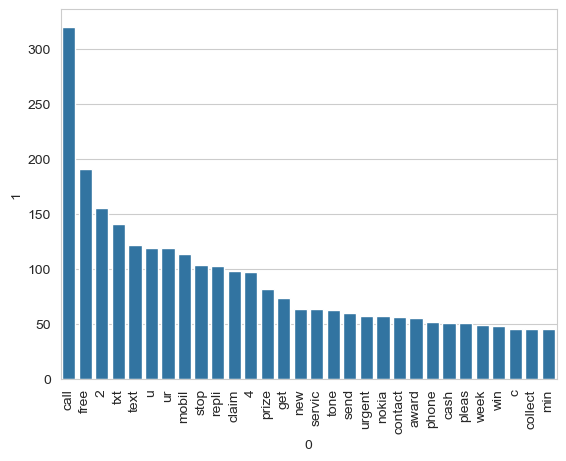

<Figure size 1200x800 with 0 Axes>

In [494]:
sns.barplot(x = spam_most_common_used[0],y= spam_most_common_used[1])
plt.xticks(rotation = 'vertical')
plt.figure(figsize= (12,8))
plt.show()

In [495]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [496]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [497]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [498]:
ham_most_common_used = pd.DataFrame(Counter(ham_corpus).most_common(30))

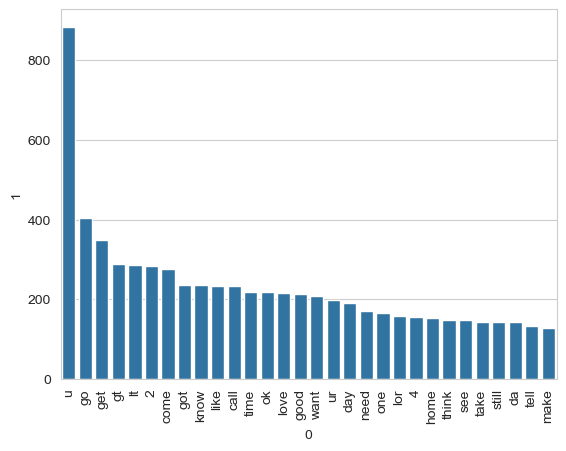

<Figure size 1200x800 with 0 Axes>

In [499]:
sns.barplot(x = ham_most_common_used[0],y= ham_most_common_used[1])
plt.xticks(rotation = 'vertical')
plt.figure(figsize= (12,8))
plt.show()

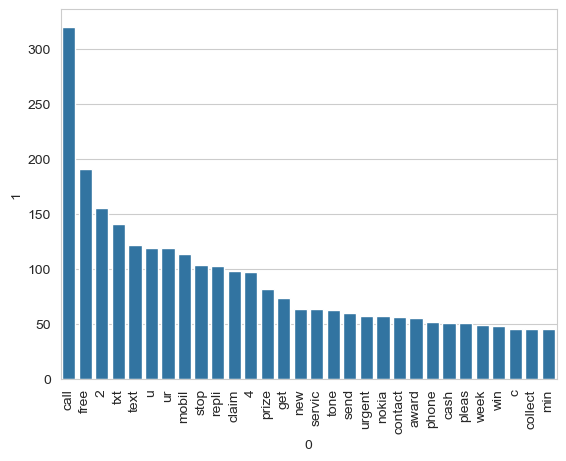

<Figure size 1200x800 with 0 Axes>

In [500]:
sns.barplot(x = spam_most_common_used[0],y= spam_most_common_used[1])
plt.xticks(rotation = 'vertical')
plt.figure(figsize= (12,8))
plt.show()

# 4.Model Building

We chose Naive bayes over here

Naive Bayes is commonly used for text classification because of its simplicity, efficiency, and effectiveness in handling high-dimensional data, especially in the context of natural language processing. The underlying logic of Naive Bayes is based on Bayes' theorem, which is a fundamental concept in probability theory.

### Bayes' Theorem:
\[ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \]

In the context of text classification:
- \( P(A|B) \) is the probability of class \(A\) given the features \(B\) (i.e., the probability of a document belonging to a certain category given its words or features).
- \( P(B|A) \) is the probability of features \(B\) given class \(A\) (i.e., the likelihood of seeing certain words in documents of a specific category).
- \( P(A) \) is the prior probability of class \(A\) (i.e., the probability of a document belonging to class \(A\) without considering its features).
- \( P(B) \) is the probability of features \(B\) occurring (i.e., the probability of observing the given words).

### Naive Assumption:
The "naive" part of Naive Bayes comes from the assumption that features (words in the case of text classification) are conditionally independent given the class label. In other words, the presence or absence of a particular word is assumed to be independent of the presence or absence of other words, given the class label.

### Text Classification with Naive Bayes:
1. **Training:**
   - Calculate the prior probabilities \( P(A) \) for each class based on the training set.
   - Calculate the likelihood \( P(B|A) \) for each feature (word) given each class.

2. **Prediction:**
   - For a given document with features \( B \), calculate \( P(A|B) \) for each class using Bayes' theorem.
   - Classify the document into the class with the highest \( P(A|B) \).

### Advantages for Text Classification:
1. **Efficiency:**
   - Naive Bayes is computationally efficient and requires relatively small amounts of training data compared to more complex models.
  
2. **High-Dimensional Data:**
   - In text classification, the feature space (vocabulary) can be very large. Naive Bayes can handle high-dimensional data efficiently.

3. **Good Performance:**
   - Despite its simplicity and the naive assumption, Naive Bayes often performs surprisingly well in text classification tasks, especially when there is a large amount of data.

4. **Easy Interpretability:**
   - The model is easy to interpret, and the probability estimates can be used to understand the model's confidence in its predictions.

While Naive Bayes is effective for many text classification tasks, it may not capture more complex relationships between words. However, its simplicity and efficiency make it a popular choice, especially as a baseline model for comparison in text classification experiments.

In [501]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [502]:
# we vectorize the string inputs and then feed it into the X(training set)
X = tfidf.fit_transform(df['transform_text']).toarray()


In [503]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [504]:
df

,target,text,number_charachters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


In [505]:
# #let's try scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [506]:
# X = np.hstack((X,df['number_charachters'].values.reshape(-1,1)))

In [507]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [508]:
y=  df['target'].values

In [509]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [510]:
from sklearn.model_selection import train_test_split


In [511]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size= 0.3)

In [512]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [513]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [514]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8736299161831077
[[1169  162]
 [  34  186]]
0.5344827586206896


In [515]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9716312056737588
[[1329    2]
 [  42  178]]
0.9888888888888889


In [516]:
## Accuracy doesnt matter as the data is imbalanced we need more precisoion than accuracy

In [517]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9742101869761445
[[1324    7]
 [  33  187]]
0.9639175257731959


In [518]:
## tfidf and mnb is chosen

In [519]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [520]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [521]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [522]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [523]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9698492462311558)

In [524]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.9698492462311558
For  KN
Accuracy -  0.9045776918117344
Precision -  1.0
For  NB
Accuracy -  0.9716312056737588
Precision -  0.9888888888888889
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8641975308641975
For  LR
Accuracy -  0.9451966473243069
Precision -  0.8947368421052632
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9888268156424581
For  AdaBoost
Accuracy -  0.9542230818826564
Precision -  0.9116022099447514
For  BgC
Accuracy -  0.9600257898130239
Precision -  0.8726415094339622
For  ETC
Accuracy -  0.9774339136041263
Precision -  0.9946524064171123
For  GBDT
Accuracy -  0.9484203739522888
Precision -  0.9545454545454546
For  xgb
Accuracy -  0.9664732430689877
Precision -  0.9285714285714286


In [525]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [526]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [527]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.904578,1.000000
8,ETC,0.977434,0.994652
2,NB,0.971631,0.988889
5,RF,0.970986,0.988827
0,SVC,0.978723,0.969849
9,GBDT,0.948420,0.954545
10,xgb,0.966473,0.928571
6,AdaBoost,0.954223,0.911602
4,LR,0.945197,0.894737
7,BgC,0.960026,0.872642


In [528]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [529]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.904578
1,ETC,Accuracy,0.977434
2,NB,Accuracy,0.971631
3,RF,Accuracy,0.970986
4,SVC,Accuracy,0.978723
5,GBDT,Accuracy,0.948420
6,xgb,Accuracy,0.966473
7,AdaBoost,Accuracy,0.954223
8,LR,Accuracy,0.945197
9,BgC,Accuracy,0.960026


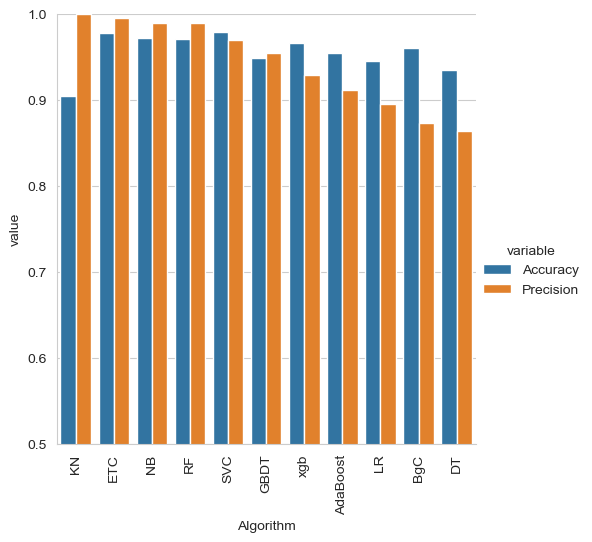

In [530]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [531]:
# Model improve
## 1.) Change the max_features parameter of Tfidf - (This has improved )
## 2.) Min_Max scaler () -not much of a use so we will be not consider this

In [532]:
## Voting Classifier with the best performing Models (to get better results than all 3 by combining)


In [533]:
svc = SVC(kernel = 'sigmoid',gamma = 1, probability = True)
mn =  MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [534]:
voting = VotingClassifier(estimators = [('svm',svc),('mnb',mn),('etc',etc)],voting = 'soft' )

In [535]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1, kernel='sigmoid', probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [536]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision" ,precision_score(y_test,y_pred))

Accuracy 0.9832366215344939
Precision 0.9948979591836735


In [537]:
## Applying Stacking (to check if we could improve our scores)
estimators = [('svm',svc),['nb',mnb],['etc',etc]]
final_estimator = RandomForestClassifier()

In [538]:
from sklearn.ensemble import StackingClassifier

In [539]:
clf = StackingClassifier(estimators = estimators,final_estimator=final_estimator)

In [540]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1, kernel='sigmoid',
                                    probability=True)),
                               ['nb', MultinomialNB()],
                               ['etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)]],
                   final_estimator=RandomForestClassifier())

In [541]:
y_pred = clf.predict(X_test)

In [542]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9780786589297228


In [543]:
print("Precision",precision_score(y_test,y_pred))

Precision 0.9305555555555556


In [544]:
## MNB is best as of now so we will take it

In [545]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))